# DIGIT RECOGNIZER

### Importing Libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dropout, Dense, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from keras.utils.np_utils import to_categorical
from sklearn.cross_validation import train_test_split

Importing our train and test sets: Its in the repository for everyone!

In [6]:
train= pd.read_csv('/home/shreemoyee/Downloads/train (1).csv')

test = pd.read_csv('/home/shreemoyee/Downloads/test (1).csv')

In [7]:
train.shape

(42000, 785)

We are running the model on first 20000 images for saving memory!

In [8]:
train=train[:20000]

In [10]:
train_images = (train.ix[:,1:].values).astype('float32')
train_labels = train.ix[:,0].values.astype('int32')

/home/shreemoyee/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [12]:
train_images = train_images.reshape((20000, 28 * 28))


In [13]:
test_images = (test.values).astype('float32')

Normalizing our images

In [14]:
train_images = train_images / 255
test_images = test_images / 255

In [15]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Nest step is to apply one head encoding on our labels which currently are of form 1,2,3,4,5,6,7,8,9. 

In [16]:
train_labels = to_categorical(train_labels)
num_classes = train_labels.shape[1]
num_classes

10

### Designing Neural Network

In [17]:
seed=43
np.random.seed(seed)

In [18]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=(28 * 28)))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.compile(optimizer=RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(train_images, train_labels, validation_split = 0.05, nb_epoch=15, batch_size=64)

/home/shreemoyee/anaconda2/lib/python2.7/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 19000 samples, validate on 1000 samples
Epoch 1/15
19000/19000 [==============================] - 2s - loss: 0.7504 - acc: 0.7852 - val_loss: 0.3373 - val_acc: 0.8990
Epoch 2/15
19000/19000 [==============================] - 1s - loss: 0.2943 - acc: 0.9148 - val_loss: 0.2756 - val_acc: 0.9120
Epoch 3/15
19000/19000 [==============================] - 1s - loss: 0.2351 - acc: 0.9309 - val_loss: 0.2173 - val_acc: 0.9340
Epoch 4/15
19000/19000 [==============================] - 1s - loss: 0.1991 - acc: 0.9416 - val_loss: 0.1925 - val_acc: 0.9420
Epoch 5/15
19000/19000 [==============================] - 1s - loss: 0.1771 - acc: 0.9478 - val_loss: 0.1855 - val_acc: 0.9440
Epoch 6/15
19000/19000 [==============================] - 1s - loss: 0.1562 - acc: 0.9553 - val_loss: 0.1774 - val_acc: 0.9440
Epoch 7/15
19000/19000 [==============================] - 1s - loss: 0.1424 - acc: 0.9588 - val_loss: 0.1581 - val_acc: 0.9510
Epoch 8/15
19000/19000 [==============================] - 1s -

Increase the number of epochs for instantly getting higher accuracy

### Checking our error:

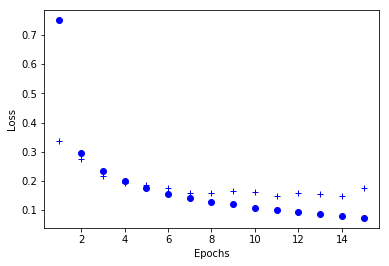

In [22]:
history_dict = history.history
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [ ]:
### Finally 

In [24]:
predictions = model.predict_classes(test_images, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("/home/shreemoyee/Downloads/DR.csv", index=False, header=True)